In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data_ine = pd.read_csv('data/turistas_es_2015_2024.csv', sep = ';')

In [3]:
raw_data_ine_ccaa = pd.read_csv('data/turistas_es_ccaa_2015_2024.csv', sep = ';', encoding='iso-8859-1')

In [4]:
df_ine_total = raw_data_ine.copy()

In [5]:
df_ine_ccaa = raw_data_ine_ccaa.copy()

In [6]:
df_ine_total.describe()

,Periodo,Total
count,111,111
unique,111,110
top,2024M12,.
freq,1,2


In [7]:
df_ine_ccaa.describe()

,Comunidad autónoma de destino,Periodo,Total
count,1998,1998,1998
unique,18,111,1669
top,Total nacional,2024M12,.
freq,111,18,328


In [8]:
df_ine_ccaa.head()

,Comunidad autónoma de destino,Periodo,Total
0,Total nacional,2024M12,5.265.945
1,Total nacional,2024M11,5.665.204
2,Total nacional,2024M10,8.965.310
3,Total nacional,2024M09,9.595.136
4,Total nacional,2024M08,10.930.750


### información básica

In [9]:
df_ine_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Periodo  111 non-null    object
 1   Total    111 non-null    object
dtypes: object(2)
memory usage: 1.9+ KB


In [10]:
df_ine_ccaa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Comunidad autónoma de destino  1998 non-null   object
 1   Periodo                        1998 non-null   object
 2   Total                          1998 non-null   object
dtypes: object(3)
memory usage: 47.0+ KB


### comprobar valores nulos

In [11]:
df_ine_total.isna().sum()

Periodo    0
Total      0
dtype: int64

In [12]:
df_ine_total['Total'].dtype

dtype('O')

In [13]:
df_ine_ccaa.isna().sum()

Comunidad autónoma de destino    0
Periodo                          0
Total                            0
dtype: int64

### conversion de tipos
por ejemplo asytpe(int) asume que no hay nulls, si no , usar astype('Int64')
los datos tienen un par de valores vacios y también separación de miles con .

In [14]:
df_ine_total['Total'] = (df_ine_total['Total']
                   .str.replace('.', '')  # Remove the dots
                   .replace('', np.nan)    # Convert empty strings to NaN
                   .astype(float)         # Convert to float
                   .astype('Int64'))      # Convert to nullable integer

In [15]:
df_ine_total['Total'].isna().sum()

np.int64(2)

In [16]:
df_ine_ccaa['Total'] = (df_ine_ccaa['Total']
                   .str.replace('.', '')  # Remove the dots
                   .replace('', np.nan)    # Convert empty strings to NaN
                   .astype(float)         # Convert to float
                   .astype('Int64'))      # Convert to nullable integer

In [17]:
df_ine_ccaa.head()

,Comunidad autónoma de destino,Periodo,Total
0,Total nacional,2024M12,5265945
1,Total nacional,2024M11,5665204
2,Total nacional,2024M10,8965310
3,Total nacional,2024M09,9595136
4,Total nacional,2024M08,10930750


In [18]:
# Parse to datetime using the literal "M"
df_ine_ccaa['fecha'] = pd.to_datetime(df_ine_ccaa['Periodo'], format='%YM%m')

In [19]:
df_ine_ccaa.head()

,Comunidad autónoma de destino,Periodo,Total,fecha
0,Total nacional,2024M12,5265945,2024-12-01
1,Total nacional,2024M11,5665204,2024-11-01
2,Total nacional,2024M10,8965310,2024-10-01
3,Total nacional,2024M09,9595136,2024-09-01
4,Total nacional,2024M08,10930750,2024-08-01


### renombrado y eliminación de columnas

In [20]:
df_ine_ccaa.rename(columns = {
    'Comunidad autónoma de destino':'ccaa_destino',
    'Total':'total'
}, inplace = True)

In [21]:
df_ine_ccaa.drop(['Periodo'], axis =1, inplace = True)

In [22]:
df_ine_ccaa.head()

,ccaa_destino,total,fecha
0,Total nacional,5265945,2024-12-01
1,Total nacional,5665204,2024-11-01
2,Total nacional,8965310,2024-10-01
3,Total nacional,9595136,2024-09-01
4,Total nacional,10930750,2024-08-01


### pivot data

In [23]:
df_ine_ccaa_pivoted = df_ine_ccaa.pivot(index='fecha', columns='ccaa_destino', values='total')

In [24]:
df_ine_ccaa_pivoted.head()

ccaa_destino,01 Andalucía,02 Aragón,"03 Asturias, Principado de","04 Balears, Illes",05 Canarias,06 Cantabria,07 Castilla y León,08 Castilla - La Mancha,09 Cataluña,10 Comunitat Valenciana,11 Extremadura,12 Galicia,"13 Madrid, Comunidad de","14 Murcia, Región de","15 Navarra, Comunidad Foral de",16 País Vasco,"17 Rioja, La",Total nacional
fecha,,,,,,,,,,,,,,,,,,
2015-10-01,996515,49599,17410,991830,1094268,37710,124362,<NA>,1521926,624144,23600,103929,562247,108006,24700,124023,<NA>,6432341
2015-11-01,487964,31223,9786,125595,1103158,18479,62519,<NA>,1029270,319290,<NA>,40529,371205,33701,17567,67554,<NA>,3754802
2015-12-01,446806,46839,16997,95914,1054142,17256,69920,17931,890133,320260,20886,29019,332461,36204,12138,98103,7001,3512914
2016-01-01,453459,30403,13471,102379,1108379,9983,41401,14480,865842,318136,<NA>,31655,397420,30499,12020,60108,<NA>,3526537
2016-02-01,493279,39760,8340,164735,1114746,21386,39775,<NA>,930354,349586,<NA>,36099,332794,46519,7383,67922,<NA>,3678726


### plot

<Axes: title={'center': 'turistas totales'}, xlabel='fecha'>

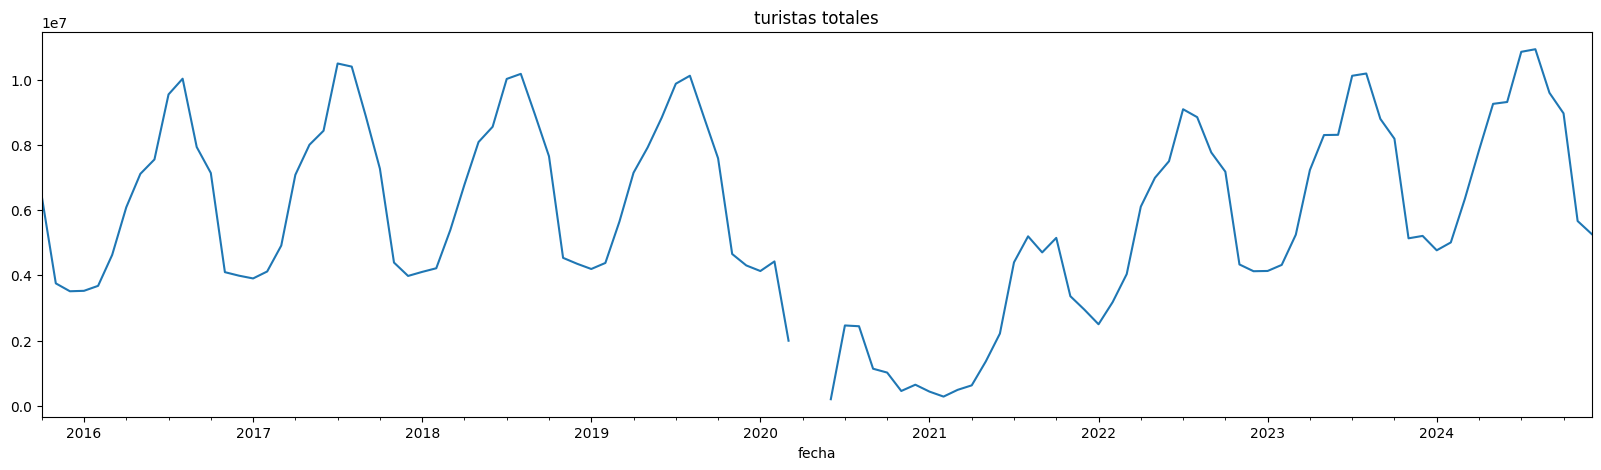

In [25]:
df_ine_ccaa_pivoted['Total nacional'].plot(figsize=(20,5), title = 'turistas totales')

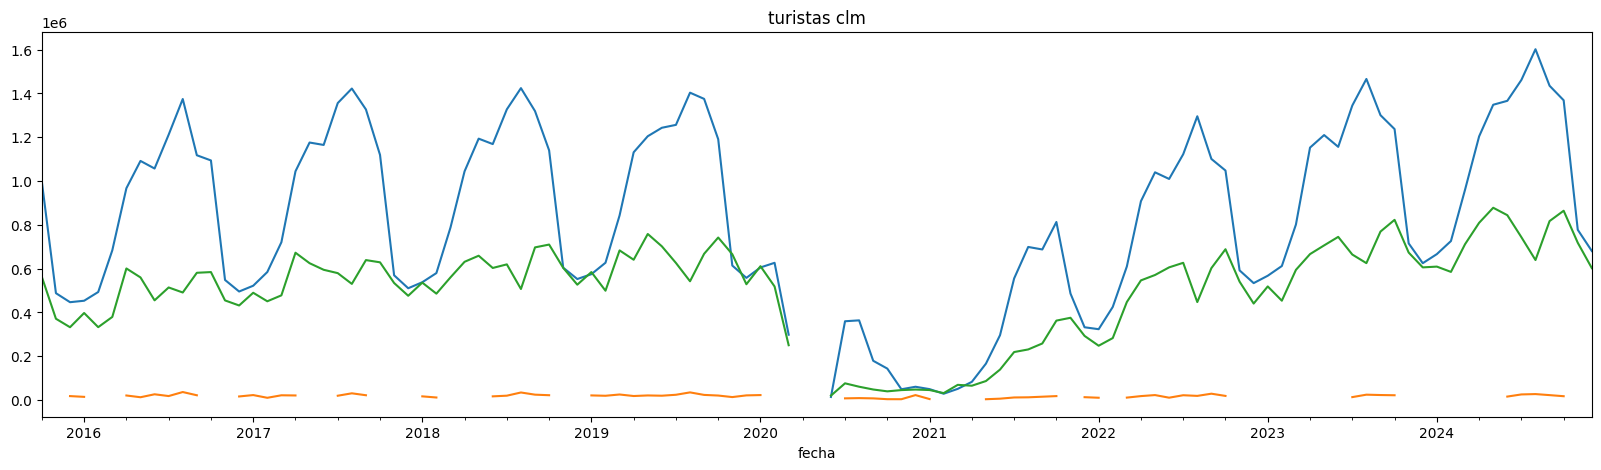

In [26]:
df_ine_ccaa_pivoted['01 Andalucía'].plot(figsize=(20,5), title = 'turistas andalucía')
df_ine_ccaa_pivoted['08 Castilla - La Mancha'].plot(figsize=(20,5), title = 'turistas clm')
df_ine_ccaa_pivoted['13 Madrid, Comunidad de'].plot(figsize=(20,5), title = 'turistas clm')
plt.show()

### QQ plot
para ver si los datos siguen una distribución normal

In [27]:
import scipy.stats
import pylab

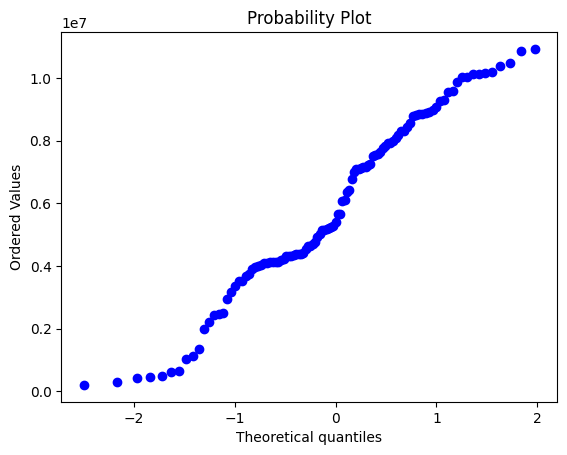

In [28]:
scipy.stats.probplot(df_ine_ccaa_pivoted['Total nacional'], plot = pylab)
pylab.show()

## convertir datos de índice a datetime

In [29]:
df_ine_ccaa_pivoted.index.to_series().describe()
# la fecha está en el índice, hay que accederlo con .index y además no tiene función describe(), hay que pasarlo a list

count                              111
mean     2020-05-01 10:48:38.918918912
min                2015-10-01 00:00:00
25%                2018-01-16 12:00:00
50%                2020-05-01 00:00:00
75%                2022-08-16 12:00:00
max                2024-12-01 00:00:00
Name: fecha, dtype: object

In [30]:
df_ine_ccaa_pivoted_ts = df_ine_ccaa_pivoted.asfreq('MS')
# MS = month start, si uso ME month end, no coge nada porque al convertir 2020M01, se coge el primer día del mes

In [31]:
df_ine_ccaa_pivoted_ts.isna().sum()

ccaa_destino
01 Andalucía                        2
02 Aragón                           4
03 Asturias, Principado de         28
04 Balears, Illes                   2
05 Canarias                         2
06 Cantabria                        7
07 Castilla y León                  3
08 Castilla - La Mancha            39
09 Cataluña                         2
10 Comunitat Valenciana             2
11 Extremadura                     66
12 Galicia                          3
13 Madrid, Comunidad de             2
14 Murcia, Región de                2
15 Navarra, Comunidad Foral de     57
16 País Vasco                       2
17 Rioja, La                      103
Total nacional                      2
dtype: int64

In [32]:
df_ine_ccaa_pivoted_ts.describe()

ccaa_destino,01 Andalucía,02 Aragón,"03 Asturias, Principado de","04 Balears, Illes",05 Canarias,06 Cantabria,07 Castilla y León,08 Castilla - La Mancha,09 Cataluña,10 Comunitat Valenciana,11 Extremadura,12 Galicia,"13 Madrid, Comunidad de","14 Murcia, Región de","15 Navarra, Comunidad Foral de",16 País Vasco,"17 Rioja, La",Total nacional
count,109.0,107.0,83.0,109.0,109.0,104.0,108.0,72.0,109.0,109.0,45.0,108.0,109.0,109.0,54.0,109.0,8.0,109.0
mean,830190.733945,38521.485981,26377.795181,977251.036697,992438.376147,30022.125,93650.092593,18871.722222,1301863.009174,681244.357798,30206.622222,108137.953704,505892.155963,72347.275229,33835.666667,121642.587156,14246.375,5852687.082569
std,413563.771501,17502.390558,15965.485686,879583.557801,362488.076997,21450.016062,51142.117309,7336.142643,671401.759393,345745.991537,12981.108767,60395.228344,215033.429683,38643.961794,21294.703033,59797.601851,4494.919257,2835726.584759
min,13997.0,3820.0,2832.0,13190.0,2826.0,1456.0,9842.0,3663.0,54348.0,28152.0,11679.0,12895.0,20221.0,1841.0,5796.0,9884.0,7001.0,204272.0
25%,548318.0,28843.0,16164.5,152665.0,952069.0,15073.75,61902.25,13405.75,870157.0,429384.0,23150.0,66419.25,431820.0,47624.0,17040.5,80415.0,11970.25,4106601.0
50%,787749.0,36852.0,20894.0,656091.0,1105470.0,24572.0,84590.0,19747.5,1155003.0,653407.0,28200.0,98531.0,560178.0,67603.0,29147.0,115478.0,14293.0,5265945.0
75%,1191120.0,46860.0,34670.0,1897022.0,1192866.0,39235.5,117082.75,22668.5,1850823.0,937202.0,35727.0,146707.75,639316.0,100080.0,41777.75,163289.0,16196.25,8187022.0
max,1602146.0,88365.0,72324.0,2542500.0,1543234.0,92124.0,254118.0,36481.0,2567612.0,1476378.0,83353.0,305870.0,878117.0,187089.0,91072.0,269524.0,22014.0,10930750.0


In [33]:
df_ine_ccaa_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 111 entries, 2015-10-01 to 2024-12-01
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   01 Andalucía                    109 non-null    Int64
 1   02 Aragón                       107 non-null    Int64
 2   03 Asturias, Principado de      83 non-null     Int64
 3   04 Balears, Illes               109 non-null    Int64
 4   05 Canarias                     109 non-null    Int64
 5   06 Cantabria                    104 non-null    Int64
 6   07 Castilla y León              108 non-null    Int64
 7   08 Castilla - La Mancha         72 non-null     Int64
 8   09 Cataluña                     109 non-null    Int64
 9   10 Comunitat Valenciana         109 non-null    Int64
 10  11 Extremadura                  45 non-null     Int64
 11  12 Galicia                      108 non-null    Int64
 12  13 Madrid, Comunidad de         109 non-null 

In [34]:
df_ine_ccaa_pivoted_ts.head()

ccaa_destino,01 Andalucía,02 Aragón,"03 Asturias, Principado de","04 Balears, Illes",05 Canarias,06 Cantabria,07 Castilla y León,08 Castilla - La Mancha,09 Cataluña,10 Comunitat Valenciana,11 Extremadura,12 Galicia,"13 Madrid, Comunidad de","14 Murcia, Región de","15 Navarra, Comunidad Foral de",16 País Vasco,"17 Rioja, La",Total nacional
fecha,,,,,,,,,,,,,,,,,,
2015-10-01,996515,49599,17410,991830,1094268,37710,124362,<NA>,1521926,624144,23600,103929,562247,108006,24700,124023,<NA>,6432341
2015-11-01,487964,31223,9786,125595,1103158,18479,62519,<NA>,1029270,319290,<NA>,40529,371205,33701,17567,67554,<NA>,3754802
2015-12-01,446806,46839,16997,95914,1054142,17256,69920,17931,890133,320260,20886,29019,332461,36204,12138,98103,7001,3512914
2016-01-01,453459,30403,13471,102379,1108379,9983,41401,14480,865842,318136,<NA>,31655,397420,30499,12020,60108,<NA>,3526537
2016-02-01,493279,39760,8340,164735,1114746,21386,39775,<NA>,930354,349586,<NA>,36099,332794,46519,7383,67922,<NA>,3678726


### split de datos
voy a coger desde 2021 para delante , hasta 2023

In [35]:
fecha_separacion = '2023-12-31'
fecha_inicio = '2021-01-01'

In [36]:
df = df_ine_ccaa_pivoted_ts.loc[(df_ine_ccaa_pivoted_ts.index > fecha_inicio) & 
    (df_ine_ccaa_pivoted_ts.index  <= fecha_separacion) ]

In [37]:
df_test = df_ine_ccaa_pivoted_ts.loc[df_ine_ccaa_pivoted_ts.index > fecha_separacion]

In [38]:
df.tail()

ccaa_destino,01 Andalucía,02 Aragón,"03 Asturias, Principado de","04 Balears, Illes",05 Canarias,06 Cantabria,07 Castilla y León,08 Castilla - La Mancha,09 Cataluña,10 Comunitat Valenciana,11 Extremadura,12 Galicia,"13 Madrid, Comunidad de","14 Murcia, Región de","15 Navarra, Comunidad Foral de",16 País Vasco,"17 Rioja, La",Total nacional
fecha,,,,,,,,,,,,,,,,,,
2023-08-01,1466334,43429,67459,2359442,1062818,91420,214915,24456,2154210,1272665,34651,276973,625174,144958,31942,269524,<NA>,10186163
2023-09-01,1300924,45414,38073,2061298,1026257,46614,115988,22787,1818670,1042340,17274,166960,769335,103720,36060,167256,<NA>,8795425
2023-10-01,1237399,30068,18816,1476654,1269415,28701,93621,21800,1669786,1033167,20867,132476,822942,87641,33737,183679,<NA>,8187022
2023-11-01,715475,25352,<NA>,213740,1332768,8653,58486,<NA>,1145608,653407,<NA>,77064,673552,59130,30460,96324,<NA>,5135498
2023-12-01,624935,38005,<NA>,165588,1374111,29980,96570,<NA>,1020095,712546,<NA>,184891,605809,72216,<NA>,180463,<NA>,5209085


In [ ]:
df_test.head()

### estacionariedad (no == estacionalidad)

La estacionariedad en una serie temporal significa que sus características estadísticas, como la media (promedio) y la varianza (dispersión de los datos), permanecen constantes a lo largo del tiempo. 

Ejemplo de proceso estacionario:

Considera las fluctuaciones diarias de la temperatura en una habitación con control climático constante. Aunque pueda haber pequeñas variaciones debido a factores menores, la temperatura promedio y su variabilidad se mantienen constantes a lo largo del tiempo, lo que indica un proceso estacionario.

Ejemplo de proceso no estacionario:

Imagina el valor de una acción en el mercado bursátil. Este valor puede mostrar tendencias ascendentes o descendentes a lo largo del tiempo debido a diversos factores económicos, políticos o empresariales. Estas tendencias indican que la media y posiblemente la varianza cambian con el tiempo, caracterizando un proceso no estacionario.

La identificación de la estacionariedad en una serie temporal es crucial para aplicar modelos estadísticos apropiados y obtener análisis y predicciones precisas.

Tipos de estacionariedad:

Estacionariedad estricta: La distribución completa de la serie es constante en el tiempo. Esto implica que todas las propiedades estadísticas (media, varianza y distribución conjunta) no cambian con el tiempo.

Estacionariedad en sentido amplio (o débil): Solo la media y la varianza son constantes en el tiempo, y la covarianza entre dos puntos depende únicamente de la distancia temporal entre ellos, no del momento específico en que se midan.
